In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_acc

0.9853658536585366

In [5]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)
dt_limited_acc = accuracy_score(y_test, y_pred_limited)

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_acc

0.9853658536585366

In [8]:
cv_scores = cross_val_score(rf, X, y, cv=5)

In [9]:
cv_scores

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [10]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

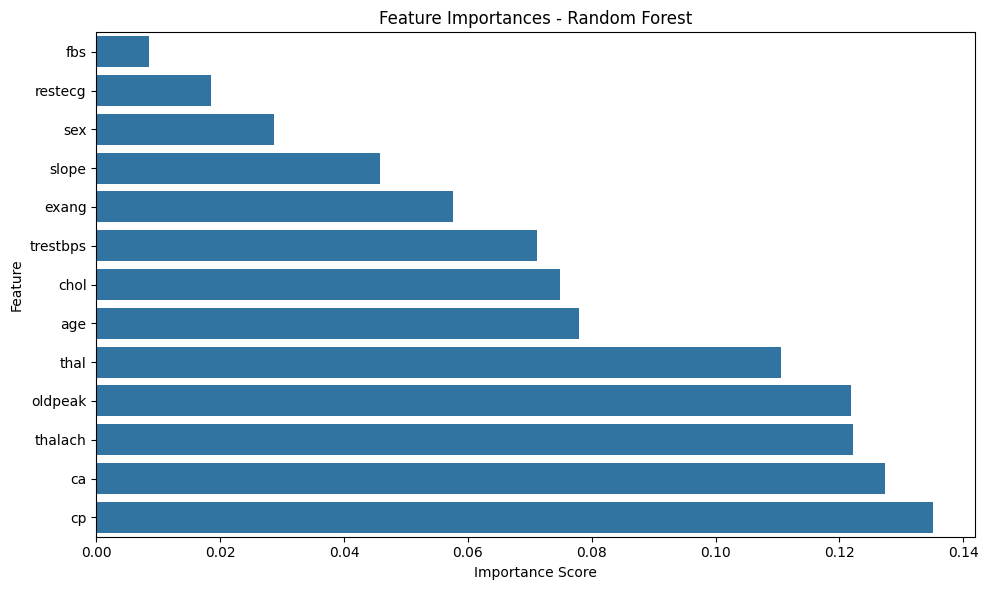

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [12]:
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Decision Tree (depth=4) Accuracy: {dt_limited_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Decision Tree Accuracy: 0.9854
Decision Tree (depth=4) Accuracy: 0.8000
Random Forest Accuracy: 0.9854
Random Forest Cross-Validation Accuracy: 0.9971
